In [13]:
# 使用的框架paddle
# 相关框架的加载
import paddle
from paddle.nn import Linear
import paddle.nn.functional as F
import os
import gzip
import json
import random
import numpy as np

In [14]:
import paddle
from paddle.vision.transforms import Normalize

def get_MNIST_dataloader():
    # 定义图像归一化处理方法，这里的CHW指图像格式需为 [C通道数，H图像高度，W图像宽度]
    transform = Normalize(mean=[127.5], std=[127.5], data_format='CHW')
    # 下载数据集并初始化 DataSet
    train_dataset = paddle.vision.datasets.MNIST(mode='train', transform=transform)
    test_dataset = paddle.vision.datasets.MNIST(mode='test', transform=transform)

    # 定义并初始化数据读取器
    train_loader = paddle.io.DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=1, drop_last=True)
    test_loader = paddle.io.DataLoader(test_dataset, batch_size=64, shuffle=False, num_workers=1, drop_last=False)

    return train_loader, test_loader

In [15]:
train_loader, test_loader = get_MNIST_dataloader()

e:\SoftWare\Program\Anaconda\envs\d2l\lib\site-packages\paddle\io\reader.py:433: UserWarning: DataLoader with multi-process mode is not supported on MacOs and Windows currently. Please use signle-process mode with num_workers = 0 instead
  warnings.warn(


In [23]:
class SOFTMAX_NET(paddle.nn.Layer):
    def __init__(self):
        super(SOFTMAX_NET, self).__init__()
        self.fc1 = Linear(in_features=784, out_features=10)
        
    def forward(self, inputs):
        inputs = paddle.reshape(inputs, [inputs.shape[0], 784])
        outputs1 = self.fc1(inputs)
        outputs_final = F.softmax(outputs1)
        return outputs_final


In [24]:
def train(model):
    model.train()
    
    # 训练参数
    opt = paddle.optimizer.SGD(learning_rate=0.05, parameters=model.parameters())
    EPOCH_NUM = 10
    losses = []

    # 训练
    for epoch_id in range(EPOCH_NUM):
        for batch_id, data in enumerate(train_loader()):
            # 数据准备
            images, labels = data
            images = paddle.to_tensor(images)
            labels = paddle.to_tensor(labels)

            # 前向训练
            predicts = model(images)

            # 交叉熵损失
            loss = F.cross_entropy(predicts, labels)
            avg_loss = paddle.mean(loss)


            #每训练200批次的数据，打印下当前Loss的情况
            if batch_id % 200 == 0:
                losses.append(avg_loss.numpy()[0])
                print("epoch: {}, batch: {}, loss is: {}".format(epoch_id, batch_id, avg_loss.numpy()))
            
            # 反向
            avg_loss.backward()
            opt.step()
            opt.clear_grad()

    import matplotlib.pyplot as plt
    plot_x = np.arange(len(losses))
    plot_y = np.array(losses)
    plt.plot(plot_x, plot_y)
    plt.xlabel('Iterations')
    plt.ylabel('Cross_Loss')
    plt.show()

    return losses

epoch: 0, batch: 0, loss is: [2.319068]
epoch: 0, batch: 200, loss is: [1.9784186]
epoch: 0, batch: 400, loss is: [1.8731861]
epoch: 0, batch: 600, loss is: [1.7609036]
epoch: 0, batch: 800, loss is: [1.7547088]
epoch: 1, batch: 0, loss is: [1.7945935]
epoch: 1, batch: 200, loss is: [1.8418014]
epoch: 1, batch: 400, loss is: [1.8340743]
epoch: 1, batch: 600, loss is: [1.7444136]
epoch: 1, batch: 800, loss is: [1.7387847]
epoch: 2, batch: 0, loss is: [1.7637134]
epoch: 2, batch: 200, loss is: [1.7216073]
epoch: 2, batch: 400, loss is: [1.7713566]
epoch: 2, batch: 600, loss is: [1.7684093]
epoch: 2, batch: 800, loss is: [1.724558]
epoch: 3, batch: 0, loss is: [1.6802766]
epoch: 3, batch: 200, loss is: [1.5658767]
epoch: 3, batch: 400, loss is: [1.6784208]
epoch: 3, batch: 600, loss is: [1.6573]
epoch: 3, batch: 800, loss is: [1.672125]
epoch: 4, batch: 0, loss is: [1.6529887]
epoch: 4, batch: 200, loss is: [1.7407854]
epoch: 4, batch: 400, loss is: [1.6904243]
epoch: 4, batch: 600, loss 

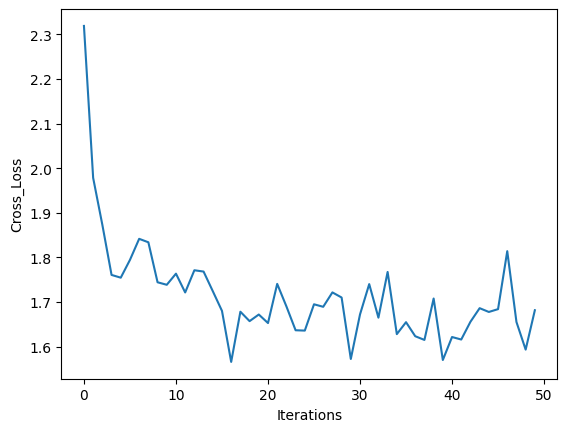

In [25]:
model_softmax = SOFTMAX_NET()
losses_softmax = train(model_softmax)

In [26]:
def evaluation(model, datasets):
    model.eval()

    acc_set = list()
    for batch_id, data in enumerate(datasets()):
        images, labels = data
        images = paddle.to_tensor(images)
        labels = paddle.to_tensor(labels)
        pred = model(images)   # 获取预测值
        acc = paddle.metric.accuracy(input=pred, label=labels)
        acc_set.extend(acc.numpy())
    
    # #计算多个batch的准确率
    acc_val_mean = np.array(acc_set).mean()
    return acc_val_mean

In [27]:
acc_of_softmax = evaluation(model_softmax, test_loader)
print(f'acc_of_softmax:{acc_of_softmax}')

acc_of_softmax:0.8304139971733093
